In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from collections import defaultdict 
from matplotlib.pyplot import figure 

In [2]:
LOG_DIRS = ["../debug_logs/cam-actions/"] 

INITIAL_CUT = 0  
CUT = 30_000 
SMOOTH = 100     

In [3]:
def running_mean(X, N=SMOOTH):
    cumsum = np.cumsum(np.insert(X, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N) 

Exps
 {'cam_new--n_2--cp_update_timestep_50', 'cam_new--n_2--cp_update_timestep_35', 'cam_new--n_2--cp_update_timestep_140', 'cam_new--n_2--cp_update_timestep_90', 'cam_new--n_2--cp_update_timestep_100', 'cam_new--n_2--cp_update_timestep_15', 'cam_new--n_2--cp_update_timestep_70', 'cam_new--n_2--cp_update_timestep_45', 'cam_new--n_2--cp_update_timestep_80', 'cam_new--n_2--cp_update_timestep_130', 'cam_new--n_2--cp_update_timestep_60', 'cam_new--n_2--cp_update_timestep_175', 'cam_new--n_2--cp_update_timestep_25', 'cam_new--n_2--cp_update_timestep_200', 'cam_new--n_2--cp_update_timestep_10', 'cam_new--n_2--cp_update_timestep_40', 'cam_new--n_2--cp_update_timestep_5', 'cam_new--n_2--cp_update_timestep_20', 'cam_new--n_2--cp_update_timestep_30', 'cam_new--n_2--cp_update_timestep_110', 'cam_new--n_2--cp_update_timestep_150', 'cam_new--n_2--cp_update_timestep_120'}
exp: cam_new--n_2--cp_update_timestep_175
exp: cam_new--n_2--cp_update_timestep_200
exp: cam_new--n_2--cp_update_timestep_120


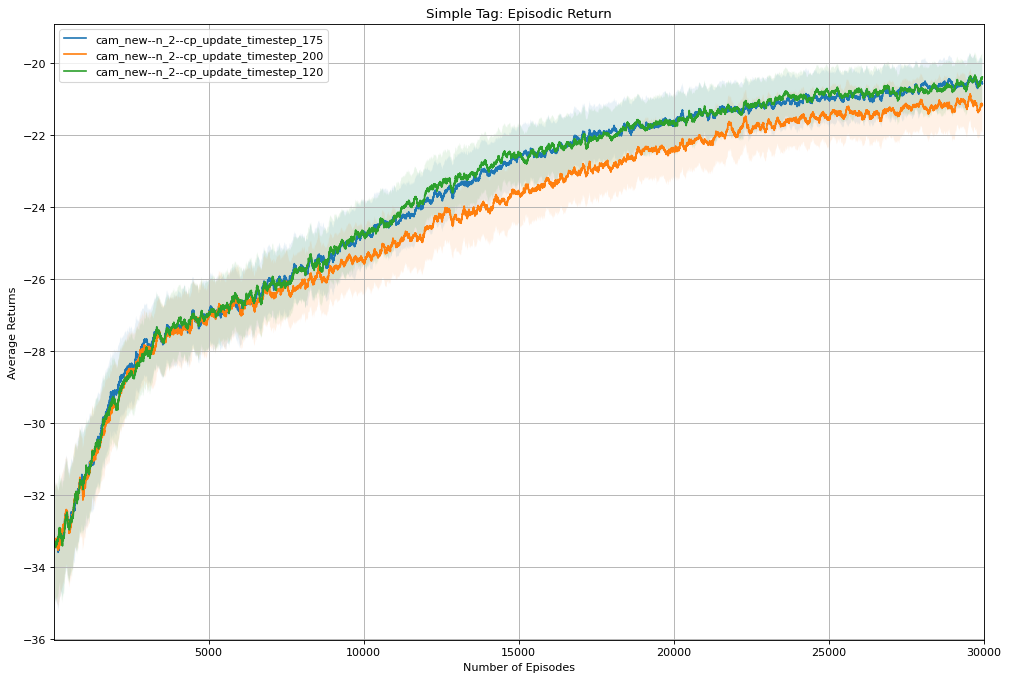

In [18]:
def plots(name="Episodic Return", condition="--"): 
    logs = [] 
    [logs.extend(glob.glob(os.path.join(log_dir, "*/**/"+name+".npy"), recursive=True)) for log_dir in LOG_DIRS] 
    # print(logs) 

    exps = set() 
    [exps.add("--".join(l.split("/")[-3].split("--")[:-1])) for l in logs] 
    print("Exps\n", exps) 
    
    vals = [] 
    figure(figsize=(15, 10), dpi=80) 
    for e in exps: 
        vals = [] 
        timestep = int(e.split("--")[-1].split("_")[-1]) 
        if (timestep>=175 and timestep<=250) or timestep==120: 
            print("exp:", e) 
            for l in logs: 
                if e in l: 
                    x = np.load(l) 
                    if (x.shape[0]>=CUT): 
                        vals.append(x[INITIAL_CUT:CUT]) 
            vals = np.array(vals)
            r_mean = np.mean(vals, axis=0)
            r_std = np.std(vals, axis=0)/np.sqrt(20) 
            x = np.arange(len(r_mean))+1 
            plt.plot(running_mean(x), running_mean(r_mean), label=e) 
            plt.fill_between(running_mean(x), running_mean(r_mean+r_std), running_mean(r_mean-r_std), alpha=0.1) 
    plt.title("Simple Tag: " + name) 
    plt.xlabel("Number of Episodes")
    plt.ylabel("Average Returns")
    plt.xlim((10, CUT)) 
    # plt.ylim((-34, -18)) 
    plt.grid()
    plt.legend() 
    plt.show() 
    plt.close() 
    
plots() 